## Course Project: Interview Preparation (Data Science- PGC, InternshalaTrainings)


## Create a Machine Learning model using various Classification Models to predict rainfall.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics


Importing the Required Libraries

In [2]:
df=pd.read_csv(r'C:\Users\LENOVO\Downloads\sydney_rain prediction.csv',header=0)

Loading the Csv file in the Dataset

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [4]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)

Creating Dummy variables for the Categorical Data

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3337 non-null   uint8  
 16  RainTomorrow  3337 non-null   uint8  
dtypes: float64(13), object(2), uint8(2)
memory usage: 397.7+ KB


In [7]:
df= df.drop('Location',axis=1)
df=df.drop('Date',axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3334 non-null   float64
 1   MaxTemp       3335 non-null   float64
 2   Rainfall      3331 non-null   float64
 3   Evaporation   3286 non-null   float64
 4   Sunshine      3321 non-null   float64
 5   Humidity9am   3323 non-null   float64
 6   Humidity3pm   3324 non-null   float64
 7   Pressure9am   3317 non-null   float64
 8   Pressure3pm   3318 non-null   float64
 9   Cloud9am      2771 non-null   float64
 10  Cloud3pm      2776 non-null   float64
 11  Temp9am       3333 non-null   float64
 12  Temp3pm       3333 non-null   float64
 13  RainToday     3337 non-null   uint8  
 14  RainTomorrow  3337 non-null   uint8  
dtypes: float64(13), uint8(2)
memory usage: 345.6 KB


Finding the null values in Df

In [9]:
df.MinTemp = df.MinTemp.fillna(df.MinTemp.mean())

In [10]:
df.MaxTemp = df.MaxTemp.fillna(df.MaxTemp.mean())

In [11]:
df.Rainfall = df.Rainfall.fillna(df.Rainfall.mean())
df.Evaporation = df.Evaporation.fillna(df.Evaporation.mean())
df.Sunshine = df.Sunshine.fillna(df.Sunshine.mean())
df.Humidity9am = df.Humidity9am.fillna(df.Humidity9am.mean())
df.Humidity3pm = df.Humidity3pm.fillna(df.Humidity3pm.mean())
df.Pressure9am= df.Pressure9am.fillna(df.Pressure9am.mean())
df.Pressure3pm= df.Pressure3pm.fillna(df.Pressure3pm.mean())
df.Cloud9am= df.Cloud9am.fillna(df.Cloud9am.mean())
df.Cloud3pm = df.Cloud3pm.fillna(df.Cloud3pm.mean())
df.Temp9am= df.Temp9am.fillna(df.Temp9am.mean())
df.Temp3pm = df.Temp3pm.fillna(df.Temp3pm.mean())


Filling the Null values with mean by fillna() function

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3337 non-null   float64
 1   MaxTemp       3337 non-null   float64
 2   Rainfall      3337 non-null   float64
 3   Evaporation   3337 non-null   float64
 4   Sunshine      3337 non-null   float64
 5   Humidity9am   3337 non-null   float64
 6   Humidity3pm   3337 non-null   float64
 7   Pressure9am   3337 non-null   float64
 8   Pressure3pm   3337 non-null   float64
 9   Cloud9am      3337 non-null   float64
 10  Cloud3pm      3337 non-null   float64
 11  Temp9am       3337 non-null   float64
 12  Temp3pm       3337 non-null   float64
 13  RainToday     3337 non-null   uint8  
 14  RainTomorrow  3337 non-null   uint8  
dtypes: float64(13), uint8(2)
memory usage: 345.6 KB


In [13]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.259515,0.259215
std,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156,0.438434,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000


using describe to see if there are any outliers,skewness in the data

## Creating Graphical plots with seaborn

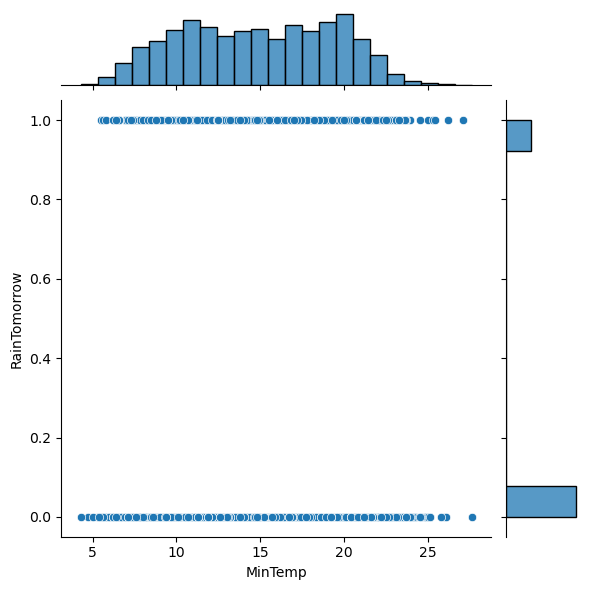

In [14]:
sns.jointplot(x="MinTemp", y="RainTomorrow", data=df)

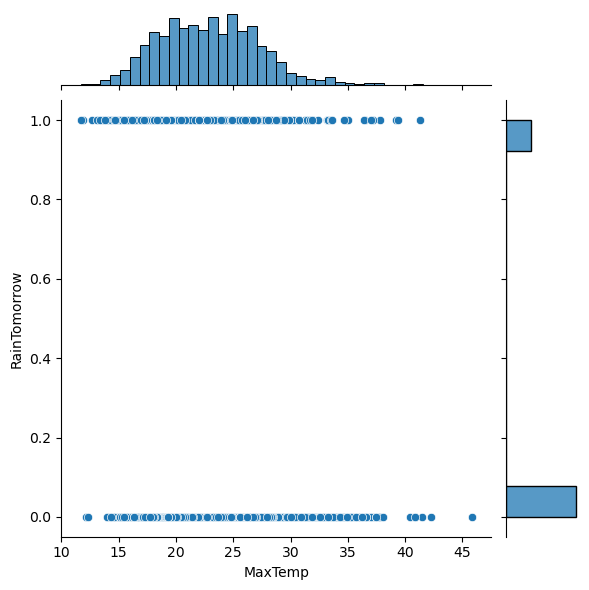

In [15]:
sns.jointplot(x="MaxTemp", y="RainTomorrow", data=df)

<AxesSubplot:xlabel='count', ylabel='RainToday'>

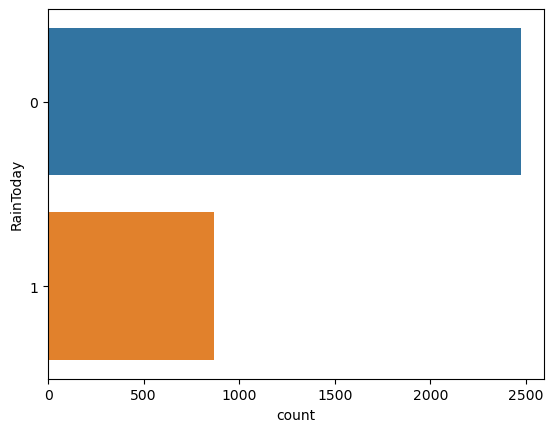

In [16]:
sns.countplot(y="RainToday",  data=df)

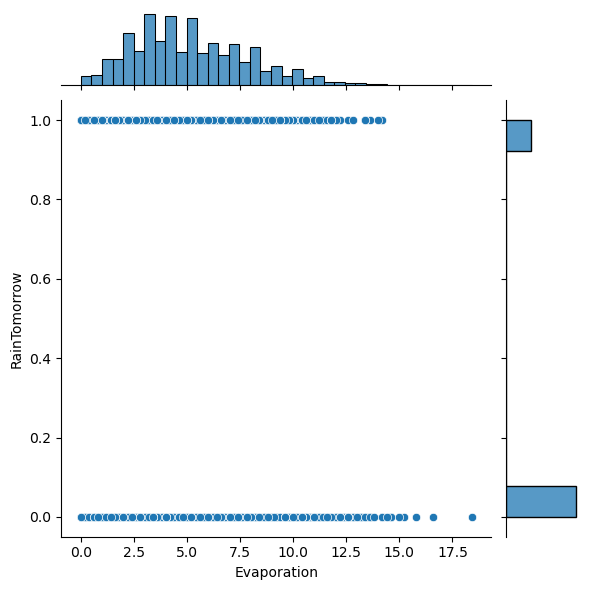

In [17]:
sns.jointplot(x="Evaporation", y="RainTomorrow", data=df)

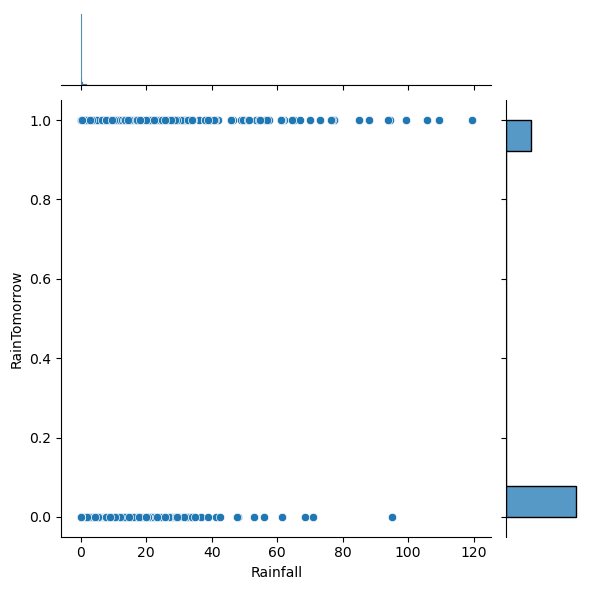

In [18]:
sns.jointplot(x="Rainfall", y="RainTomorrow", data=df)

## Outlier Treatment

In [19]:
np.percentile(df.Rainfall,[99])[0]

52.29599999999982

In [20]:
np.percentile(df.Rainfall,[99])[0]

52.29599999999982

In [21]:
uv = np.percentile(df.Rainfall,[99])[0]

In [22]:
df[(df.Rainfall>uv)]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4,19.7,25.7,77.4,5.187432,0.000000,88.0,74.0,1008.3,1004.8,8.000000,8.00000,22.5,25.5,1,1
218,11.8,14.2,62.2,5.187432,0.000000,92.0,88.0,1014.8,1013.1,8.000000,8.00000,13.0,12.3,1,1
633,14.4,17.0,73.2,5.187432,0.000000,91.0,60.0,1023.7,1025.3,8.000000,8.00000,14.7,16.6,1,1
737,20.2,25.0,77.4,7.400000,0.200000,95.0,86.0,1021.6,1020.8,7.000000,8.00000,21.1,23.8,1,1
743,21.4,25.5,70.0,9.400000,0.300000,92.0,80.0,1011.9,1010.2,8.000000,8.00000,22.1,25.2,1,1
855,12.5,20.5,61.4,1.000000,4.400000,80.0,67.0,1014.2,1012.0,5.000000,7.00000,13.5,17.4,1,0
1140,18.8,23.5,99.4,5.187432,3.300000,92.0,81.0,1012.4,1010.1,4.181523,4.21866,19.4,22.2,1,1
1182,13.9,19.9,65.2,5.187432,0.700000,81.0,62.0,1019.5,1019.3,4.181523,4.21866,17.9,19.6,1,1
1232,8.7,18.5,76.8,5.187432,1.600000,91.0,83.0,1012.7,1013.5,4.181523,4.21866,14.3,15.0,1,1
1234,11.3,13.9,88.2,5.187432,0.000000,88.0,95.0,1018.3,1018.0,4.181523,4.21866,13.1,11.5,1,1


In [23]:
df.Rainfall[(df.Rainfall> 0.1*uv)]= 0.1*uv

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18012\3067578268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Rainfall[(df.Rainfall> 0.1*uv)]= 0.1*uv


In [24]:
np.percentile(df.Evaporation,[99])

array([12.8])

In [25]:
np.percentile(df.Evaporation,[99])[0]

12.8

In [26]:
uv = np.percentile(df.Evaporation,[99])[0]

In [27]:
df[(df.Evaporation>uv)]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
349,23.0,33.4,0.0000,14.2,9.400000,61.0,39.0,1009.1,1006.0,4.181523,6.00000,28.6,33.1,0,1
357,25.0,31.7,0.0000,14.2,11.900000,59.0,58.0,1009.2,1007.6,1.000000,2.00000,29.5,29.1,0,0
359,20.5,25.9,0.0000,13.6,6.800000,57.0,51.0,1019.5,1018.3,7.000000,5.00000,21.9,24.7,0,0
373,21.4,28.6,0.0000,14.2,12.200000,69.0,53.0,1010.8,1007.5,0.000000,1.00000,24.2,28.1,0,0
642,19.4,19.9,0.0000,13.2,0.000000,71.0,76.0,1017.9,1015.5,8.000000,8.00000,19.7,19.1,0,0
661,19.9,22.8,0.0000,13.4,0.300000,62.0,68.0,1021.0,1022.6,7.000000,8.00000,21.4,20.4,0,0
686,20.2,21.4,5.2296,13.6,0.000000,87.0,83.0,1014.1,1016.7,8.000000,8.00000,20.2,18.5,1,1
722,25.0,41.3,0.0000,13.4,5.600000,28.0,17.0,1007.8,1005.4,5.000000,5.00000,31.9,39.9,0,1
1098,27.6,35.6,0.0000,16.6,2.600000,56.0,77.0,1012.7,1016.1,4.181523,4.21866,28.7,22.8,0,0
1400,20.7,29.4,0.0000,13.4,8.400000,69.0,59.0,1012.6,1010.2,4.181523,4.21866,25.0,27.8,0,0


In [28]:
df.Evaporation[(df.Evaporation> 1*uv)]= 1*uv

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18012\3414945473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Evaporation[(df.Evaporation> 1*uv)]= 1*uv


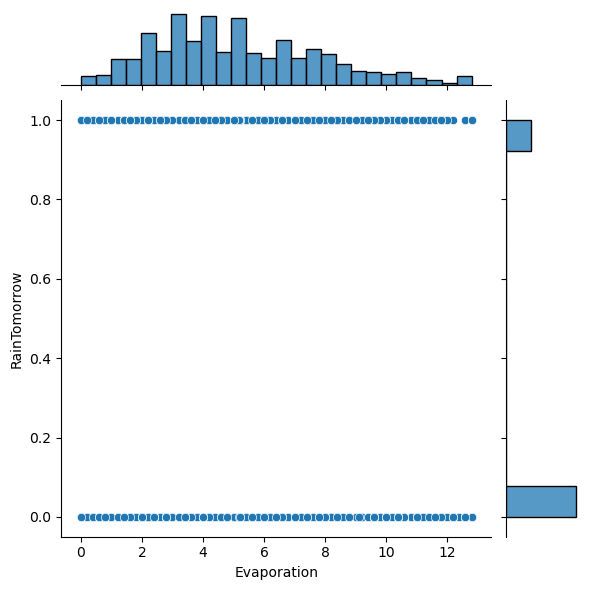

In [29]:
sns.jointplot(x="Evaporation", y="RainTomorrow", data=df)

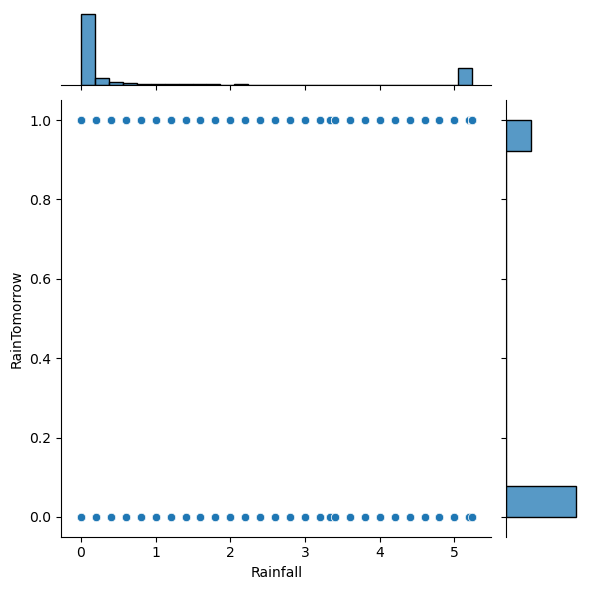

In [30]:
sns.jointplot(x="Rainfall", y="RainTomorrow", data=df)

In [31]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,1.154203,5.175445,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.259515,0.259215
std,4.551593,4.493290,1.959096,2.717728,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156,0.438434,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,45.800000,5.229600,12.800000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000


In [32]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.770701,0.026071,0.570534,-0.062959,0.052362,0.270944,-0.393024,-0.355764,0.236288,0.163519,0.938814,0.752410,0.018690,0.079962
MaxTemp,0.770701,1.000000,-0.181465,0.512355,0.325107,-0.186875,-0.152310,-0.388533,-0.424653,-0.087381,-0.099167,0.858986,0.960026,-0.188334,-0.149269
Rainfall,0.026071,-0.181465,1.000000,-0.221786,-0.374169,0.419904,0.354404,-0.013856,0.046477,0.328388,0.258353,-0.069036,-0.183020,0.924286,0.355116
Evaporation,0.570534,0.512355,-0.221786,1.000000,0.176930,-0.394900,-0.101784,-0.345655,-0.301441,-0.037946,-0.038826,0.609218,0.478571,-0.230768,-0.063757
Sunshine,-0.062959,0.325107,-0.374169,0.176930,1.000000,-0.489019,-0.582792,-0.046391,-0.094322,-0.660555,-0.676397,0.114663,0.343563,-0.367080,-0.521637
Humidity9am,0.052362,-0.186875,0.419904,-0.394900,-0.489019,1.000000,0.658120,0.263146,0.251304,0.423560,0.331734,-0.147977,-0.157149,0.400603,0.329011
Humidity3pm,0.270944,-0.152310,0.354404,-0.101784,-0.582792,0.658120,1.000000,0.154352,0.183056,0.453697,0.471684,0.128479,-0.213727,0.342936,0.471250
Pressure9am,-0.393024,-0.388533,-0.013856,-0.345655,-0.046391,0.263146,0.154352,1.000000,0.960460,-0.011072,-0.040115,-0.418943,-0.345926,-0.000113,-0.032465
Pressure3pm,-0.355764,-0.424653,0.046477,-0.301441,-0.094322,0.251304,0.183056,0.960460,1.000000,0.018972,-0.002903,-0.404472,-0.392218,0.056978,0.010977
Cloud9am,0.236288,-0.087381,0.328388,-0.037946,-0.660555,0.423560,0.453697,-0.011072,0.018972,1.000000,0.608995,0.088428,-0.089334,0.316502,0.329525


### Here we can see the correlation between our dependant variable CTC with the other variables


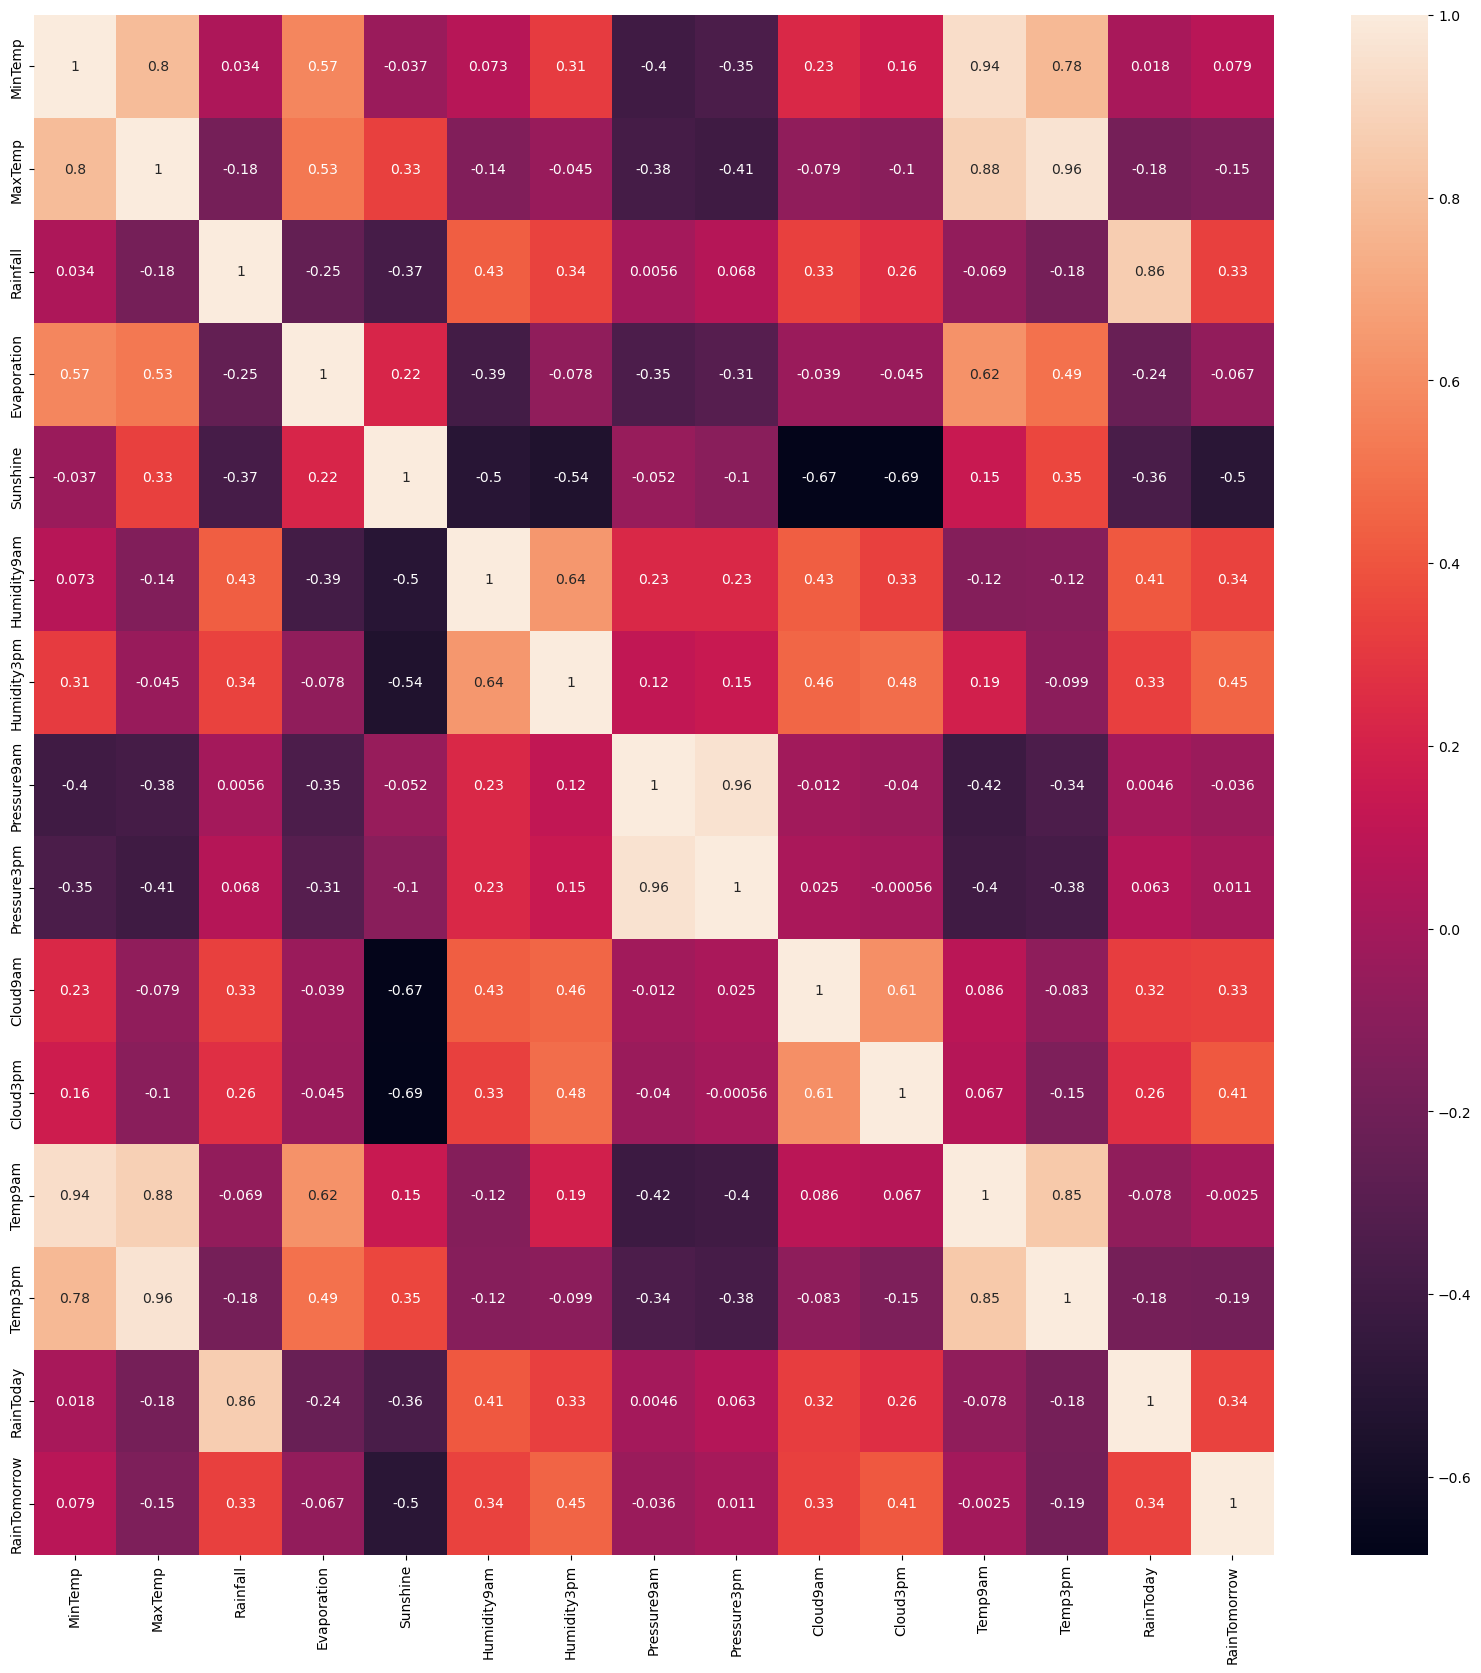

In [33]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [34]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sn
import statsmodels.discrete.discrete_model as sm

## Logistic Regression

In [35]:
X = df.loc[:, df.columns != 'RainTomorrow']

In [36]:
y = df['RainTomorrow']

In [37]:
clf_lr = LogisticRegression()
clf_lr.fit(X,y)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
clf_lr.coef_

array([[-0.0897276 ,  0.07950999,  0.24114754,  0.03736246, -0.19868927,
        -0.00065336,  0.05154713, -0.06473432,  0.06074061, -0.08412771,
         0.15946318,  0.02841106, -0.02166454,  0.05261926]])

In [39]:
clf_lr.intercept_

array([0.00067062])

In [40]:
X_cons = sn.add_constant(X)

In [41]:
logit = sm.Logit(y,X_cons).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [42]:
logit.summary()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                 3337
Model:                          Logit   Df Residuals:                     3322
Method:                           MLE   Df Model:                           14
Date:                Thu, 29 Jun 2023   Pseudo R-squ.:                     inf
Time:                        22:26:02   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          30.0807      8.516      3.532      0.000      13.389      46.772
MinTemp        -0.2404      0.048     -5.001      0.000      -0.335      -0.146
MaxTemp         0.0800      0.043      1.864      0.062      -0.004       0.164
Rainfall        0.1261      0.059      2.124      0.034       0.010       0.243
Evaporation     0.0695      0.026      2.688      0.007       0.019       0.120
Sunshine       -0.2306      0.023    -10.185      0.000      -0.275      -0.186
Humidity9am     0.0132      0.007      1.903      0.057      -0.000       0.027
Humidity3pm     0.0518      0.007      7.583      0.000       0.038       0.065
Pressure9am    -0.1155      0.031     -3.727      0.000      -0.176      -0.055
Pressure3pm     0.0816      0.030      2.729      0.006       0.023       0.140
Cloud9am       -0.0831      0.030     -2.736      0.006      -0.143      -0.024
Cloud3pm        0.1484      0.032      4.649      0.000       0.086       0.211
Temp9am         0.1349      0.051      2.628      0.009       0.034       0.235
Temp3pm        -0.0212      0.050     -0.422      0.673      -0.120       0.077
RainToday       0.3212      0.263      1.220      0.222      -0.195       0.837
===============================================================================
"""

In [43]:
clf_lr.predict_proba(X)

array([[0.07522399, 0.92477601],
       [0.20268287, 0.79731713],
       [0.07595661, 0.92404339],
       ...,
       [0.75272479, 0.24727521],
       [0.97716701, 0.02283299],
       [0.97373264, 0.02626736]])

In [44]:
y_pred = clf_lr.predict(X)
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [45]:
y_pred_03 = (clf_lr.predict_proba(X)[:,1] >= 0.3)

In [46]:
y_pred_03

array([ True,  True,  True, ..., False, False, False])

In [47]:
from sklearn.metrics import confusion_matrix , accuracy_score
confusion_matrix(y, y_pred)

array([[2300,  172],
       [ 375,  490]], dtype=int64)

In [48]:
confusion_matrix(y, y_pred_03)

array([[2047,  425],
       [ 232,  633]], dtype=int64)

In [49]:
accuracy_score(y, y_pred_03)

0.8031165717710519

## LDA

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [51]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X, y)

LinearDiscriminantAnalysis()

In [52]:
y_pred_lda = clf_lda.predict(X) 

In [53]:
y_pred_lda

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [54]:
confusion_matrix(y, y_pred_lda)

array([[2264,  208],
       [ 350,  515]], dtype=int64)

In [55]:
from sklearn.metrics import precision_score, recall_score

In [56]:
precision_score(y, y_pred)

0.7401812688821753

In [57]:
recall_score(y, y_pred)

0.5664739884393064

In [58]:
from sklearn.metrics import roc_auc_score

In [59]:
roc_auc_score(y, y_pred)

0.7484473502067083

## TEST-TRAIN SPLIT

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
print (X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(2669, 14) (668, 14) (2669,) (668,)


In [63]:
clf_LR = LogisticRegression()
clf_LR.fit(X_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
y_test_pred = clf_LR.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [66]:
confusion_matrix(y_test, y_test_pred)

array([[475,  35],
       [ 74,  84]], dtype=int64)

In [67]:
accuracy_score(y_test, y_test_pred)

0.8368263473053892

K-NEAREST NEIGHBOUR

In [68]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s= scaler.transform(X_train)

In [69]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s= scaler.transform(X_test)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors=1)
clf_knn_1.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=1)

In [71]:
confusion_matrix(y_test, clf_knn_1.predict(X_test_s))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[417,  93],
       [ 75,  83]], dtype=int64)

In [72]:
accuracy_score(y_test, clf_knn_1.predict(X_test_s))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7485029940119761

In [73]:
clf_knn_3 = KNeighborsClassifier(n_neighbors=3)
clf_knn_3.fit(X_train_s, y_train)
accuracy_score(y_test, clf_knn_3.predict(X_test_s))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8023952095808383

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,30]}

In [76]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params)

In [77]:
grid_search_cv.fit(X_train_s, y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,
                                         30]})

In [78]:
grid_search_cv.best_params_

{'n_neighbors': 20}

In [79]:
optimised_KNN = grid_search_cv.best_estimator_

In [80]:
y_test_pred = optimised_KNN.predict(X_test_s) 

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [81]:
confusion_matrix(y_test, y_test_pred)

array([[483,  27],
       [ 84,  74]], dtype=int64)

In [149]:
accuracy_score(y_test, y_test_pred)

0.811377245508982

In [150]:
accuracy_score(y_train, y_train_pred)

0.8261521168977145

In [83]:
import matplotlib.pyplot as plt


## DECISION tREE


In [84]:
from sklearn import tree

In [85]:
clftree = tree.DecisionTreeClassifier(max_depth = 3)

In [86]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [87]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [88]:
confusion_matrix(y_train, y_train_pred)

array([[1777,  185],
       [ 279,  428]], dtype=int64)

In [89]:
confusion_matrix(y_test, y_test_pred)

array([[457,  53],
       [ 73,  85]], dtype=int64)

In [90]:
accuracy_score(y_test, y_test_pred)

0.811377245508982

In [91]:
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= X_train.columns, filled = True)

In [92]:
from IPython.display import Image

In [93]:
import pydotplus

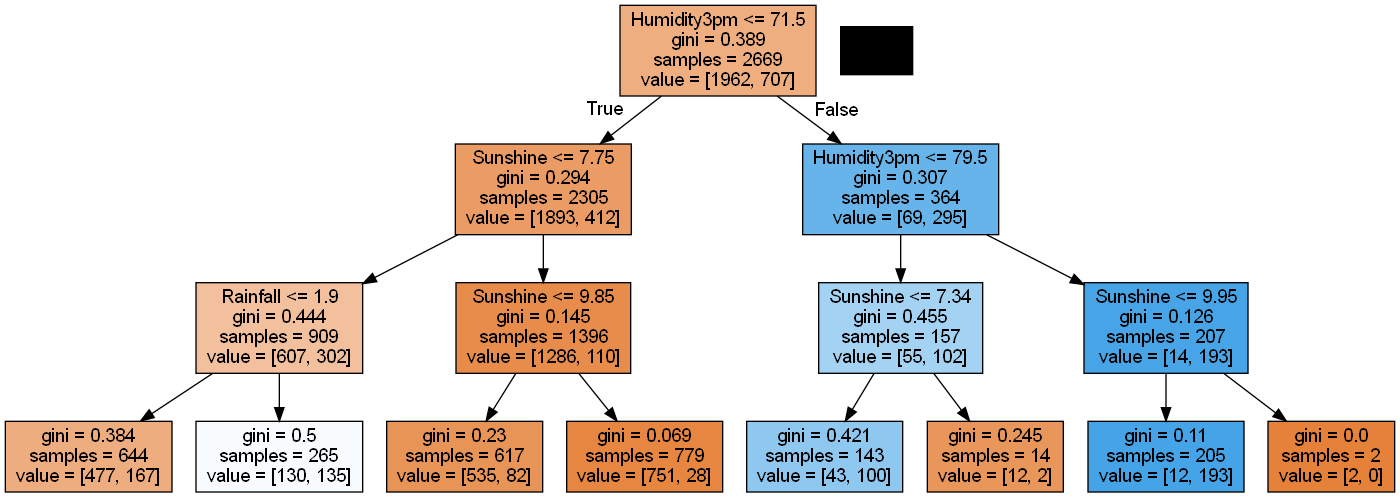

In [94]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

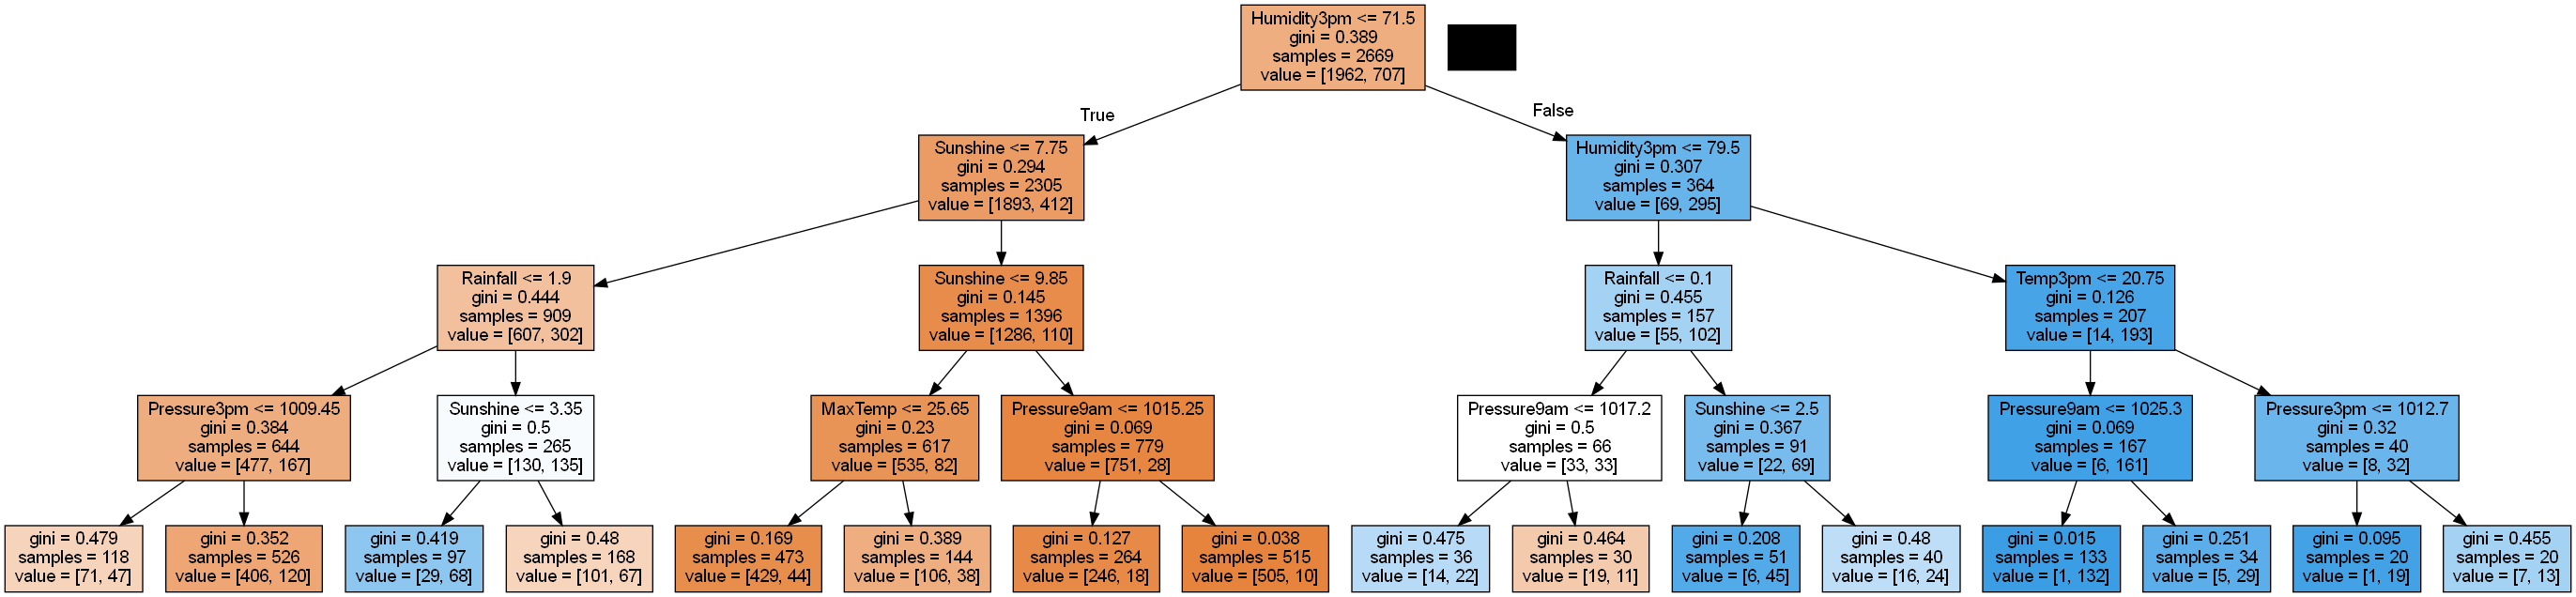

In [95]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth=4)
clftree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(clftree2, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [96]:
accuracy_score(y_test, clftree2.predict(X_test))

0.8233532934131736

## Bagging Classifier

In [97]:
from sklearn.ensemble import BaggingClassifier

In [98]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [99]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=1000, n_jobs=-1, random_state=42)

In [100]:
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[484,  26],
       [ 82,  76]], dtype=int64)

In [101]:
accuracy_score(y_test, bag_clf.predict(X_test))

0.8383233532934131

## RANDOM FOREST

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

In [104]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [105]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[479,  31],
       [ 79,  79]], dtype=int64)

In [106]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.8353293413173652

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
rf_clf = RandomForestClassifier(n_estimators=250,random_state=42)

In [109]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [2, 3, 10],
              }

In [110]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [111]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [112]:
grid_search.best_params_ 

{'max_features': 5, 'min_samples_split': 10}

In [113]:
cvrf_clf = grid_search.best_estimator_

In [146]:
accuracy_score(y_test, cvrf_clf.predict(X_test))

0.8323353293413174

In [147]:
accuracy_score(y_train, cvrf_clf.predict(X_train))

0.95391532409142

In [115]:
confusion_matrix(y_test, cvrf_clf.predict(X_test))

array([[475,  35],
       [ 77,  81]], dtype=int64)

## GRADIENT BOOSTING

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

In [117]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [118]:
accuracy_score(y_test, gbc_clf.predict(X_test))

0.8368263473053892

In [119]:
gbc_clf2 = GradientBoostingClassifier(learning_rate =0.02, n_estimators =1000, max_depth = 1)
gbc_clf2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [120]:
accuracy_score(y_train, gbc_clf2.predict(X_train))

0.84563506931435

In [121]:
accuracy_score(y_test, gbc_clf2.predict(X_test))

0.844311377245509

## Ada boost

In [122]:
from sklearn.ensemble import AdaBoostClassifier

In [123]:
ada_clf = AdaBoostClassifier(learning_rate =0.02, n_estimators =5000)

In [124]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [125]:
accuracy_score(y_train, ada_clf.predict(X_train))

0.8553765455226676

In [126]:
accuracy_score(y_test, ada_clf.predict(X_test))

0.8398203592814372

In [127]:
ada_clf2 = AdaBoostClassifier(rf_clf,learning_rate =0.05, n_estimators =500)

In [128]:
ada_clf2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=250,
                                                         random_state=42),
                   learning_rate=0.05, n_estimators=500)

In [129]:
accuracy_score(y_test, ada_clf2.predict(X_test))

0.8413173652694611

## XG BOOST

In [130]:
import xgboost as xgb

In [131]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1)

In [132]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [133]:
accuracy_score(y_test, xgb_clf.predict(X_test))

0.8353293413173652

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

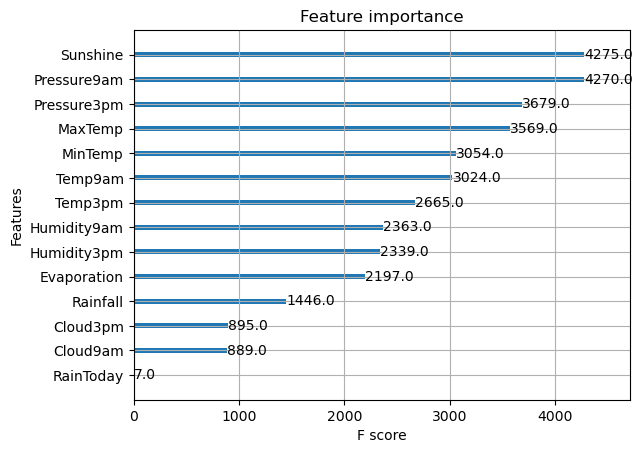

In [134]:
xgb.plot_importance(xgb_clf)

In [135]:
xgb_clf = xgb.XGBClassifier(n_estimators=250,learning_rate=0.1, random_state=42)

In [136]:
param_test1 = {
 'max_depth':range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[ 1e-2, 0.1, 1]
}

In [137]:
grid_search = GridSearchCV(xgb_clf, param_test1,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [138]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [139]:
cvxg_clf = grid_search.best_estimator_

In [140]:
accuracy_score(y_test, cvxg_clf.predict(X_test))

0.8338323353293413

In [141]:
grid_search.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.2,
 'max_depth': 3,
 'reg_alpha': 0.1,
 'subsample': 0.9}

In [142]:
accuracy_score(y_train, cvxg_clf.predict(X_train))

0.9037092544023979

### 1.Your views about the problem statement?

This model can have a very practical use in real-life according to me as one can predict whether it may rain or not tomorrow by entering several perameters such as temprature,sunshine,wheter it rrained today or not and by finding out the result he/she can plan thier day accordingly.

### 2.What will be your approach to solving this task?

First we will import the data into notebook, then I would use getdummies to change categorical variables then after that we will look for any missing values or null values.Then we go to outlier treatment to seeif there are'nt any outliers present and if there are then we will treat then.we will find the correlation between the dependent variable and the other variables,after that we will import Logistic regression model test-train the data,preprocess perform LDA,KNN and also try Decision Tree models to see which gives the best accuracy.

### 3.What were the available ML model options you had to perform this task 
ML models available to perform this task first was Logistic Regression,we could also use LDA and KNN Classifiers find the better accuracy.The other model available was Decision Tree also we could use ensemble techniques like bagging,Random Forest,Gradient Boosting,adaboost,xgboost to find the best accuracy.

### 4. Which model’s performance is best and what could be the possible reason for that?

Random forest has the best accuracy out of all the models this can be because Random forests are created from subsets of data, and the final output is based on average or majority ranking; hence the problem of overfitting is taken care of alsoRandom forest randomly selects observations, builds a decision tree, and takes the average result. It doesn’t use any set of formulas. 

### 5. What steps can you take to improve this selected model’s performance even further?

1.We can have data more accurate date with less missing values,scale the data even further,we can use Feature engineering helps improve the accuracy of machine learning models by allowing them to make more accurate predictions.

2.Making use of data pre-processing techniques like feature extraction and selection to help us find the most important features in the dataset. Its goal is to reduce or eliminate noise and improve the accuracy of machine learning models by removing redundant information from them (i.e., data points containing only one feature).

3.Also trying Multiple Algorithms can help to impove the model's performace and changing Hyper parameters like Grid search which searches the best combination of hyperparameters for the data which can be really usefull in Decision Trees and KNN Classifiers.